In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#Transfering data to GPU memory will take time and we only do it, if we really need to use GPU
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],-1) #reshape 2D image into a 1D vector
x_test = x_test.reshape(x_test.shape[0], -1) #reshape 2D image into a 1D vector
##
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
#normalizing the input vectors
x_train /= 255 
x_test /= 255

In [5]:
no_classes = 10

In [6]:
#change the output to one-hot vectors
y_train = keras.utils.to_categorical(y_train, no_classes)
y_test = keras.utils.to_categorical(y_test, no_classes)

In [7]:
def create_model(shape_of_input, no_classes, no_hidden_layers=0, no_units_per_layer=50):
    model = Sequential()
    if (no_hidden_layers == 0):
        model.add(Dense(no_classes, input_shape = shape_of_input, name='output_layer', activation='softmax'))
        return model
    model.add(Dense(no_units_per_layer, input_shape = shape_of_input,  activation='relu'))
    model.add(Dropout(0.15))
    model.add(BatchNormalization())
    for i in range(no_hidden_layers-1):
        model.add(Dense(no_units_per_layer, activation='relu'))
        model.add(Dropout(0.15))
        model.add(BatchNormalization())
    model.add(Dense(no_classes, name='output_layer', activation='softmax'))
    return model

In [8]:
x = []
y_train_error = []
y_test_error = []
for i in range(10,210,10):
    x.append(i)
    model = create_model((x_train.shape[1],), no_classes, 5, i)
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print('%d neurons per layer' % i)
    model.fit(x_train, y_train, epochs=50, batch_size=128, verbose=1, validation_data=(x_test, y_test))
    #train error
    _, train_accuracy = model.evaluate(x_train, y_train)
    train_error = (1 - train_accuracy)*100
    y_train_error.append(train_error)
    #test_error
    _, test_accuracy = model.evaluate(x_test, y_test)
    test_error = (1 - test_accuracy)*100
    y_test_error.append(test_error)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

Epoch 41/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9235 - accuracy: 0.2834 - val_loss: 1.8146 - val_accuracy: 0.3285
Epoch 42/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9155 - accuracy: 0.2864 - val_loss: 1.8747 - val_accuracy: 0.2849
Epoch 43/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9217 - accuracy: 0.2852 - val_loss: 1.8243 - val_accuracy: 0.3192
Epoch 44/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9169 - accuracy: 0.2841 - val_loss: 1.9254 - val_accuracy: 0.2706
Epoch 45/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9186 - accuracy: 0.2876 - val_loss: 1.8865 - val_accuracy: 0.2884
Epoch 46/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9177 - accuracy: 0.2866 - val_loss: 1.8835 - val_accuracy: 0.2902
Epoch 47/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9188 - accuracy: 0.2841 - val_loss: 1.8356 - val_accuracy: 0.3123

Epoch 30/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8442 - accuracy: 0.3278 - val_loss: 1.8209 - val_accuracy: 0.3427
Epoch 31/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8477 - accuracy: 0.3255 - val_loss: 1.8337 - val_accuracy: 0.3267
Epoch 32/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8461 - accuracy: 0.3254 - val_loss: 1.8012 - val_accuracy: 0.3386
Epoch 33/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8388 - accuracy: 0.3299 - val_loss: 1.7933 - val_accuracy: 0.3429
Epoch 34/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8432 - accuracy: 0.3286 - val_loss: 1.8053 - val_accuracy: 0.3391
Epoch 35/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8423 - accuracy: 0.3260 - val_loss: 1.7867 - val_accuracy: 0.3454
Epoch 36/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8350 - accuracy: 0.3331 - val_loss: 1.8003 - val_accuracy: 0.3483

Epoch 19/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7958 - accuracy: 0.3449 - val_loss: 1.8136 - val_accuracy: 0.3532
Epoch 20/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7928 - accuracy: 0.3475 - val_loss: 1.7222 - val_accuracy: 0.3753
Epoch 21/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7837 - accuracy: 0.3521 - val_loss: 1.7630 - val_accuracy: 0.3634
Epoch 22/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7829 - accuracy: 0.3490 - val_loss: 1.7263 - val_accuracy: 0.3714
Epoch 23/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7769 - accuracy: 0.3525 - val_loss: 1.7307 - val_accuracy: 0.3613
Epoch 24/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7774 - accuracy: 0.3539 - val_loss: 1.7429 - val_accuracy: 0.3628
Epoch 25/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7736 - accuracy: 0.3556 - val_loss: 1.7283 - val_accuracy: 0.3674

391/391 [==============================] - 2s 5ms/step - loss: 1.8101 - accuracy: 0.3435 - val_loss: 1.6975 - val_accuracy: 0.3872
Epoch 8/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8001 - accuracy: 0.3470 - val_loss: 1.7307 - val_accuracy: 0.3686
Epoch 9/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7857 - accuracy: 0.3541 - val_loss: 1.7088 - val_accuracy: 0.3859
Epoch 10/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7729 - accuracy: 0.3579 - val_loss: 1.6930 - val_accuracy: 0.3875
Epoch 11/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7682 - accuracy: 0.3615 - val_loss: 1.6763 - val_accuracy: 0.3986
Epoch 12/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7617 - accuracy: 0.3639 - val_loss: 1.6717 - val_accuracy: 0.4050
Epoch 13/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7527 - accuracy: 0.3668 - val_loss: 1.6818 - val_accuracy: 0.3914
Epoch 14/50
3

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2281 - accuracy: 0.1993 - val_loss: 2.0290 - val_accuracy: 0.2363
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9559 - accuracy: 0.2731 - val_loss: 1.8253 - val_accuracy: 0.3203
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8995 - accuracy: 0.3026 - val_loss: 1.9654 - val_accuracy: 0.2879
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8797 - accuracy: 0.3149 - val_loss: 1.8084 - val_accuracy: 0.3585
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8518 - accuracy: 0.3254 - val_loss: 1.7553 - val_accuracy: 0.3625
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8288 - accuracy: 0.3344 - val_loss: 1.7588 - val_accuracy: 0.3526
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8103 - accuracy: 0.3436 - val_loss: 1.7802 - val_accuracy: 0.3604
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2191 - accuracy: 0.2026 - val_loss: 1.9368 - val_accuracy: 0.2713
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9265 - accuracy: 0.2905 - val_loss: 1.8713 - val_accuracy: 0.3214
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8726 - accuracy: 0.3180 - val_loss: 1.7991 - val_accuracy: 0.3439
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8341 - accuracy: 0.3326 - val_loss: 1.7095 - val_accuracy: 0.3870
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8024 - accuracy: 0.3482 - val_loss: 1.7115 - val_accuracy: 0.3757
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7728 - accuracy: 0.3613 - val_loss: 1.7342 - val_accuracy: 0.3654
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7568 - accuracy: 0.3660 - val_loss: 1.6926 - val_accuracy: 0.3841
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1888 - accuracy: 0.2162 - val_loss: 1.9243 - val_accuracy: 0.2705
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9255 - accuracy: 0.2952 - val_loss: 1.9159 - val_accuracy: 0.3202
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8570 - accuracy: 0.3237 - val_loss: 1.7849 - val_accuracy: 0.3538
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8293 - accuracy: 0.3366 - val_loss: 1.7603 - val_accuracy: 0.3600
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8009 - accuracy: 0.3514 - val_loss: 1.6880 - val_accuracy: 0.3917
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7820 - accuracy: 0.3615 - val_loss: 1.6677 - val_accuracy: 0.3998
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7550 - accuracy: 0.3660 - val_loss: 1.6729 - val_accuracy: 0.3935
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2002 - accuracy: 0.2196 - val_loss: 1.8639 - val_accuracy: 0.3282
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9111 - accuracy: 0.3031 - val_loss: 1.9237 - val_accuracy: 0.2770
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8382 - accuracy: 0.3345 - val_loss: 1.7576 - val_accuracy: 0.3595
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8064 - accuracy: 0.3453 - val_loss: 1.8547 - val_accuracy: 0.3359
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7706 - accuracy: 0.3581 - val_loss: 1.6800 - val_accuracy: 0.3866
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7545 - accuracy: 0.3657 - val_loss: 1.6689 - val_accuracy: 0.3851
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7396 - accuracy: 0.3740 - val_loss: 1.6308 - val_accuracy: 0.4012
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1848 - accuracy: 0.2180 - val_loss: 1.9198 - val_accuracy: 0.2909
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8913 - accuracy: 0.3107 - val_loss: 2.7471 - val_accuracy: 0.2473
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8332 - accuracy: 0.3341 - val_loss: 1.7891 - val_accuracy: 0.3653
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7746 - accuracy: 0.3582 - val_loss: 1.7674 - val_accuracy: 0.3727
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7560 - accuracy: 0.3691 - val_loss: 1.9642 - val_accuracy: 0.3296
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7312 - accuracy: 0.3766 - val_loss: 1.6678 - val_accuracy: 0.3975
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7201 - accuracy: 0.3822 - val_loss: 1.6194 - val_accuracy: 0.4126
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1633 - accuracy: 0.2233 - val_loss: 1.8608 - val_accuracy: 0.3142
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8852 - accuracy: 0.3134 - val_loss: 1.7599 - val_accuracy: 0.3651
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8112 - accuracy: 0.3425 - val_loss: 1.7004 - val_accuracy: 0.3865
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7829 - accuracy: 0.3556 - val_loss: 1.6661 - val_accuracy: 0.4005
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7593 - accuracy: 0.3655 - val_loss: 1.7535 - val_accuracy: 0.3537
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7587 - accuracy: 0.3661 - val_loss: 1.7578 - val_accuracy: 0.3459
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7378 - accuracy: 0.3741 - val_loss: 1.6507 - val_accuracy: 0.3966
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1472 - accuracy: 0.2320 - val_loss: 1.8311 - val_accuracy: 0.3284
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8694 - accuracy: 0.3218 - val_loss: 1.7624 - val_accuracy: 0.3641
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8086 - accuracy: 0.3426 - val_loss: 1.8130 - val_accuracy: 0.3241
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7752 - accuracy: 0.3550 - val_loss: 1.7173 - val_accuracy: 0.3761
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7490 - accuracy: 0.3694 - val_loss: 1.6565 - val_accuracy: 0.4036
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7202 - accuracy: 0.3776 - val_loss: 1.6161 - val_accuracy: 0.4197
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6958 - accuracy: 0.3923 - val_loss: 1.6534 - val_accuracy: 0.3998
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1389 - accuracy: 0.2385 - val_loss: 1.8845 - val_accuracy: 0.2902
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8706 - accuracy: 0.3209 - val_loss: 1.7938 - val_accuracy: 0.3536
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8076 - accuracy: 0.3471 - val_loss: 1.7046 - val_accuracy: 0.3883
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7789 - accuracy: 0.3581 - val_loss: 1.7224 - val_accuracy: 0.3771
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7490 - accuracy: 0.3685 - val_loss: 1.8427 - val_accuracy: 0.3373
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7104 - accuracy: 0.3852 - val_loss: 1.6551 - val_accuracy: 0.4014
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7038 - accuracy: 0.3852 - val_loss: 1.6052 - val_accuracy: 0.4217
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1446 - accuracy: 0.2393 - val_loss: 1.9388 - val_accuracy: 0.2877
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8505 - accuracy: 0.3282 - val_loss: 1.7959 - val_accuracy: 0.3393
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8142 - accuracy: 0.3411 - val_loss: 1.7421 - val_accuracy: 0.3738
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7729 - accuracy: 0.3600 - val_loss: 1.7624 - val_accuracy: 0.3687
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7262 - accuracy: 0.3777 - val_loss: 1.6323 - val_accuracy: 0.4096
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6945 - accuracy: 0.3868 - val_loss: 1.6594 - val_accuracy: 0.3891
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6701 - accuracy: 0.3993 - val_loss: 1.6483 - val_accuracy: 0.4093
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1261 - accuracy: 0.2458 - val_loss: 1.9415 - val_accuracy: 0.3052
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8564 - accuracy: 0.3253 - val_loss: 1.7449 - val_accuracy: 0.3637
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8024 - accuracy: 0.3456 - val_loss: 1.6897 - val_accuracy: 0.3816
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7526 - accuracy: 0.3681 - val_loss: 1.6527 - val_accuracy: 0.4020
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7156 - accuracy: 0.3829 - val_loss: 1.6514 - val_accuracy: 0.4090
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6979 - accuracy: 0.3883 - val_loss: 1.6252 - val_accuracy: 0.4151
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6702 - accuracy: 0.3993 - val_loss: 1.5923 - val_accuracy: 0.4233
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1402 - accuracy: 0.2423 - val_loss: 1.8487 - val_accuracy: 0.3233
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8550 - accuracy: 0.3282 - val_loss: 2.2298 - val_accuracy: 0.2497
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7983 - accuracy: 0.3490 - val_loss: 1.9533 - val_accuracy: 0.3054
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7341 - accuracy: 0.3762 - val_loss: 1.7248 - val_accuracy: 0.3755
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6992 - accuracy: 0.3888 - val_loss: 1.6242 - val_accuracy: 0.4116
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6943 - accuracy: 0.3928 - val_loss: 1.6025 - val_accuracy: 0.4294
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6796 - accuracy: 0.3991 - val_loss: 1.6243 - val_accuracy: 0.4152
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1226 - accuracy: 0.2471 - val_loss: 2.0079 - val_accuracy: 0.2510
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8465 - accuracy: 0.3283 - val_loss: 1.7510 - val_accuracy: 0.3669
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7762 - accuracy: 0.3618 - val_loss: 1.7602 - val_accuracy: 0.3601
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7294 - accuracy: 0.3774 - val_loss: 1.6697 - val_accuracy: 0.4028
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7122 - accuracy: 0.3833 - val_loss: 1.6614 - val_accuracy: 0.4004
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6880 - accuracy: 0.3964 - val_loss: 1.6095 - val_accuracy: 0.4218
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6702 - accuracy: 0.4030 - val_loss: 1.5854 - val_accuracy: 0.4229
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1000 - accuracy: 0.2563 - val_loss: 2.2301 - val_accuracy: 0.2169
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8321 - accuracy: 0.3381 - val_loss: 1.9649 - val_accuracy: 0.3103
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7668 - accuracy: 0.3622 - val_loss: 1.7401 - val_accuracy: 0.3738
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7191 - accuracy: 0.3834 - val_loss: 1.6125 - val_accuracy: 0.4091
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6970 - accuracy: 0.3895 - val_loss: 1.5988 - val_accuracy: 0.4303
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6838 - accuracy: 0.3948 - val_loss: 1.6273 - val_accuracy: 0.4167
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6592 - accuracy: 0.4068 - val_loss: 1.5681 - val_accuracy: 0.4402
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1066 - accuracy: 0.2565 - val_loss: 1.8918 - val_accuracy: 0.3289
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8343 - accuracy: 0.3358 - val_loss: 1.7283 - val_accuracy: 0.3633
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7675 - accuracy: 0.3640 - val_loss: 1.7275 - val_accuracy: 0.3621
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7239 - accuracy: 0.3807 - val_loss: 1.6900 - val_accuracy: 0.3949
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7026 - accuracy: 0.3859 - val_loss: 1.6366 - val_accuracy: 0.4183
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6929 - accuracy: 0.3919 - val_loss: 1.7132 - val_accuracy: 0.3790
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6629 - accuracy: 0.4052 - val_loss: 1.5470 - val_accuracy: 0.4435
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1177 - accuracy: 0.2521 - val_loss: 2.0619 - val_accuracy: 0.2407
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8425 - accuracy: 0.3331 - val_loss: 1.7940 - val_accuracy: 0.3306
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7775 - accuracy: 0.3575 - val_loss: 1.7546 - val_accuracy: 0.3552
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7385 - accuracy: 0.3740 - val_loss: 1.6674 - val_accuracy: 0.4020
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7216 - accuracy: 0.3798 - val_loss: 1.6840 - val_accuracy: 0.3898
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6854 - accuracy: 0.3955 - val_loss: 1.5872 - val_accuracy: 0.4277
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6673 - accuracy: 0.4012 - val_loss: 1.6063 - val_accuracy: 0.4245
Epoch 

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.1098 - accuracy: 0.2536 - val_loss: 2.0741 - val_accuracy: 0.2430
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.8342 - accuracy: 0.3353 - val_loss: 1.7868 - val_accuracy: 0.3467
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7696 - accuracy: 0.3585 - val_loss: 1.6599 - val_accuracy: 0.3967
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7194 - accuracy: 0.3779 - val_loss: 2.0500 - val_accuracy: 0.3014
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6836 - accuracy: 0.3946 - val_loss: 1.6150 - val_accuracy: 0.4148
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6548 - accuracy: 0.4052 - val_loss: 1.5581 - val_accuracy: 0.4409
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6330 - accuracy: 0.4125 - val_loss: 1.6533 - val_accuracy: 0.4004
Epoch 

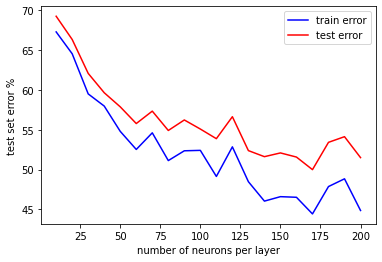

In [9]:
plt.xlabel("number of neurons per layer")
plt.ylabel('test set error %')
plt.plot(x, y_train_error, 'b', label='train error')
plt.plot(x, y_test_error, 'r', label='test error')
plt.legend()

In [10]:
f = open('number_of_neurons_per_layer___test_set_error_with_regularizer.txt', 'w')

f.write('number of neurons per layer, train error, test error\n')
for i in range(len(x)):
    f.write('{}, {}, {}'.format(x[i], y_train_error[i], y_test_error[i]))
    f.write('\n')

f.close()